In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

# Задание 1

#### Найдем численное решение стационарного уравнения теплопроводности 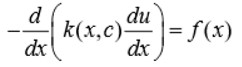
#### После двойного интегрирования получим 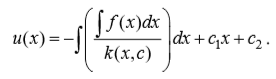

In [2]:
def get_params(k, ua, ub, variant):
    params = [(1, k, ua, ub),
              (2, 2 * k, ua, ub),
              (0.1, 0.1 * k, ua, ub),
              (1, 1 / k, ua, ub),
              (1, k, -ua, ub),
              (1, k, ua, -ub),
              (1, k, -ua, -ub)]
    return params[variant - 1]

In [91]:
def plot_solution(foo, x1, x2, label):
    x = sp.symbols('x')
    args = np.linspace(x1, x2, 200)
    y = [foo.subs({x: t}) for t in args]
    plt.plot(args, y, label=label);

In [97]:
def solve(k, a, b, ua, ub, f):
    x, c1, c2 = sp.symbols('x c1 c2')
    u = -sp.integrate(sp.integrate(f, x) / k, x) + c1 * x + c2
    sol = sp.solve([u.subs({x: a}) - ua, u.subs({x: b}) - ub], (c1, c2))
    
    print('Input data:\nk={}\na={}\nb={}\nua={}\nub={}\nf={}'.format(k, a, b, ua, ub, f))
    print('Resulting equation:', u)
    print('Solution:', sol)
    print('-' * 30)
    
    return u.subs({c1: sol[c1], c2: sol[c2]})

#### Начальные условия

In [87]:
x, k, f = sp.symbols('x k f')
f = sp.exp(2 * x)
k = sp.exp(x)

a = 0.5
b = 1.5
ua = 1
ub = 5

#### Найдем решение для первых трех наборов параметров

Solving problem set #1
Input data:
k=exp(x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - exp(x)/2
Solution: {c1: 5.41648389981897, c2: -0.883881314559425}
------------------------------
Solving problem set #2
Input data:
k=2*exp(x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - exp(x)/4
Solution: {c1: 4.70824194990949, c2: -0.941940657279715}
------------------------------
Solving problem set #3
Input data:
k=0.1*exp(x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 5.0*exp(x)
Solution: {c1: 18.1648389981897, c2: 0.161186854405810}
------------------------------


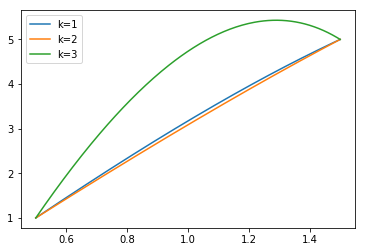

In [98]:
for var in range(1, 4):
    print('Solving problem set #{}'.format(var))
    c, cur_k, cur_ua, cur_ub = get_params(k, ua, ub, var)
    u = solve(cur_k, a, b, cur_ua, cur_ub, f)
    plot_solution(u, a, b, 'k={}'.format(var))

plt.legend()
plt.show();

Solving problem set #1
Input data:
k=exp(x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - exp(x)/2
Solution: {c1: 5.41648389981897, c2: -0.883881314559425}
------------------------------
Solving problem set #4
Input data:
k=exp(-x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - exp(3*x)/6
Solution: {c1: 18.2559070383639, c2: -7.38100534079228}
------------------------------


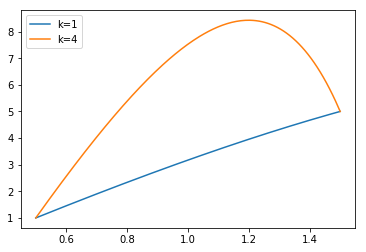

In [100]:
for var in [1, 4]:
    print('Solving problem set #{}'.format(var))
    c, cur_k, cur_ua, cur_ub = get_params(k, ua, ub, var)
    u = solve(cur_k, a, b, cur_ua, cur_ub, f)
    plot_solution(u, a, b, 'k={}'.format(var))

plt.legend()
plt.show();

Solving problem set #5
Input data:
k=exp(x)
a=0.5
b=1.5
ua=-1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - exp(x)/2
Solution: {c1: 7.41648389981897, c2: -3.88388131455942}
------------------------------
Solving problem set #6
Input data:
k=exp(x)
a=0.5
b=1.5
ua=1
ub=-5
f=exp(2*x)
Resulting equation: c1*x + c2 - exp(x)/2
Solution: {c1: -4.58351610018103, c2: 4.11611868544057}
------------------------------
Solving problem set #7
Input data:
k=exp(x)
a=0.5
b=1.5
ua=-1
ub=-5
f=exp(2*x)
Resulting equation: c1*x + c2 - exp(x)/2
Solution: {c1: -2.58351610018103, c2: 1.11611868544058}
------------------------------


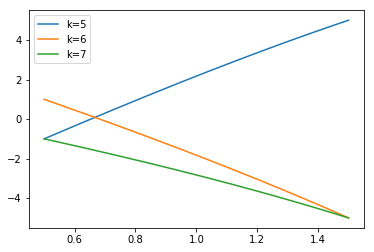

In [102]:
for var in [5, 6, 7]:
    print('Solving problem set #{}'.format(var))
    c, cur_k, cur_ua, cur_ub = get_params(k, ua, ub, var)
    u = solve(cur_k, a, b, cur_ua, cur_ub, f)
    plot_solution(u, a, b, 'k={}'.format(var))

plt.legend()

# Задание 2
### Промоделировать стационарные процессы теплопроводности стержня в зависимости от входных данных задачи – переменного коэффициента теплопроводности k(x) и плотности источников тепла f(x):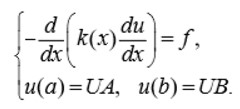

Для начала положим, что стержень состоит из 2-х материалов с различными k(x)

#### k1 << k2

Input data:
k=x**(-2)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - (2*x**2 - 2*x + 1)*exp(2*x)/8
Solution: {c1: 10.1068376742174, c2: -3.88352622283002}
------------------------------
Input data:
k=x
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - Ei(2*x)/2
Solution: {c1: 8.01935737713474, c2: -2.06211978038940}
------------------------------


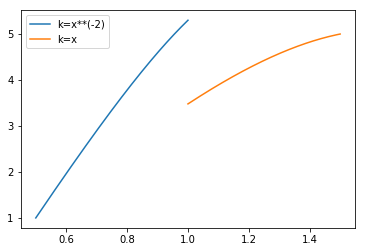

In [105]:
k11 = x**-2
u = solve(k11, a, b, ua, ub, f)
plot_solution(u, a, (b + a) / 2, 'k={}'.format(k11))

k12 = x
u = solve(k12, a, b, ua, ub, f)
plot_solution(u, (b + a) / 2, b, 'k={}'.format(k12))

plt.legend()

#### k1 >> k2

Input data:
k=exp(2*x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - x/2
Solution: {c1: 4.50000000000000, c2: -1.00000000000000}
------------------------------
Input data:
k=exp(-2*x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - exp(4*x)/8
Solution: {c1: 53.5049671742256, c2: -24.8288515747465}
------------------------------


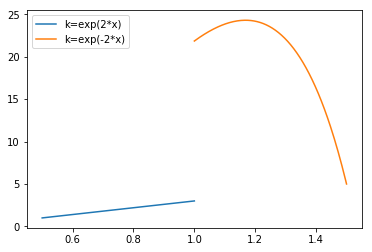

In [108]:
k21 = sp.exp(2 * x)
u = solve(k21, a, b, ua, ub, f)
plot_solution(u, a, (b + a) / 2, 'k={}'.format(k21))

k22 = sp.exp(-2 * x)
u = solve(k22, a, b, ua, ub, f)
plot_solution(u, (b + a) / 2, b, 'k={}'.format(k22))

plt.legend()

Пусть теперь стержень состоит из 3-х материалов с различными свойствами

#### k1 < k2 < k3

Input data:
k=0.34*x**2
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 2.94117647058824*Ei(2*x) + 1.47058823529412*exp(2*x)/x
Solution: {c1: 15.9465223774490, c2: -9.39433181255716}
------------------------------
Input data:
k=2*x**2
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - Ei(2*x)/2 + exp(2*x)/(4*x)
Solution: {c1: 6.03090880416631, c2: -2.42703640813471}
------------------------------
Input data:
k=x**2*exp(3)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - (2*Ei(2*x) - exp(2*x)/x)*exp(-3)/2
Solution: {c1: 4.20222599096385, c2: -1.14209591843047}
------------------------------


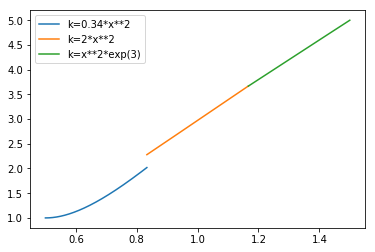

In [109]:
k31 = 0.34 * x**2
u = solve(k31, a, b, ua, ub, f)
plot_solution(u, a, a + (b - a) / 3, 'k={}'.format(k31))

k32 = 2 * x**2
u = solve(k32, a, b, ua, ub, f)
plot_solution(u, a + (b - a) / 3, b - (b - a) / 3, 'k={}'.format(k32))

k33 = sp.exp(3) * x**2
u = solve(k33, a, b, ua, ub, f)
plot_solution(u, b - (b - a) / 3, b, 'k={}'.format(k33))

plt.legend()

#### k1 > k2 > k3

Input data:
k=x**2*exp(3)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - (2*Ei(2*x) - exp(2*x)/x)*exp(-3)/2
Solution: {c1: 4.20222599096385, c2: -1.14209591843047}
------------------------------
Input data:
k=2*x**2
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - Ei(2*x)/2 + exp(2*x)/(4*x)
Solution: {c1: 6.03090880416631, c2: -2.42703640813471}
------------------------------
Input data:
k=0.5*x**2
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 2.0*Ei(2*x) + 1.0*exp(2*x)/x
Solution: {c1: 12.1236352166653, c2: -6.70814563253888}
------------------------------


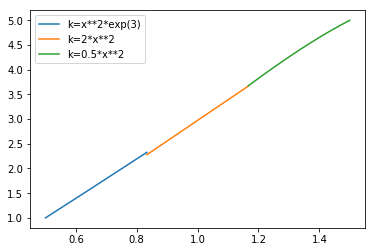

In [110]:
k31 = sp.exp(3) * x**2
u = solve(k31, a, b, ua, ub, f)
plot_solution(u, a, a + (b - a) / 3, 'k={}'.format(k31))

k32 = 2 * x**2
u = solve(k32, a, b, ua, ub, f)
plot_solution(u, a + (b - a) / 3, b - (b - a) / 3, 'k={}'.format(k32))

k33 = 0.5 * x**2
u = solve(k33, a, b, ua, ub, f)
plot_solution(u, b - (b - a) / 3, b, 'k={}'.format(k33))

plt.legend()

### k1 = k, k2 = 2k, k3 = k

Input data:
k=exp(0.1*x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 0.263157894736842*exp(1.9*x)
Solution: {c1: 7.86896636348731, c2: -2.25403327139737}
------------------------------
Input data:
k=2*exp(0.1*x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 0.131578947368421*exp(1.9*x)
Solution: {c1: 5.93448318174365, c2: -1.62701663569869}
------------------------------
Input data:
k=exp(0.1*x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 0.263157894736842*exp(1.9*x)
Solution: {c1: 7.86896636348731, c2: -2.25403327139737}
------------------------------


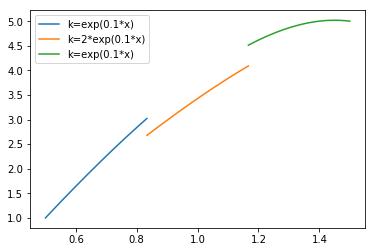

In [111]:
k31 = sp.exp(0.1 * x)
u = solve(k31, a, b, ua, ub, f)
plot_solution(u, a, a + (b - a) / 3, 'k={}'.format(k31))

k32 = 2 * sp.exp(0.1 * x)
u = solve(k32, a, b, ua, ub, f)
plot_solution(u, a + (b - a) / 3, b - (b - a) / 3, 'k={}'.format(k32))

k33 = sp.exp(0.1 * x)
u = solve(k33, a, b, ua, ub, f)
plot_solution(u, b - (b - a) / 3, b, 'k={}'.format(k33))

plt.legend()

#### k1 = 20k, k2 = k, k3 = 20k

Input data:
k=20*exp(0.1*x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 0.0131578947368421*exp(1.9*x)
Solution: {c1: 4.19344831817437, c2: -1.06270166356987}
------------------------------
Input data:
k=exp(0.1*x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 0.263157894736842*exp(1.9*x)
Solution: {c1: 7.86896636348731, c2: -2.25403327139737}
------------------------------
Input data:
k=20*exp(0.1*x)
a=0.5
b=1.5
ua=1
ub=5
f=exp(2*x)
Resulting equation: c1*x + c2 - 0.0131578947368421*exp(1.9*x)
Solution: {c1: 4.19344831817437, c2: -1.06270166356987}
------------------------------


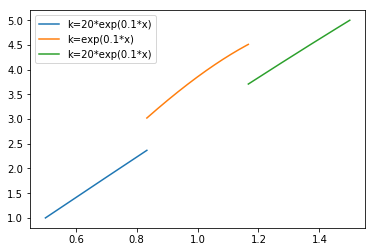

In [112]:
k31 = 20 * sp.exp(0.1 * x)
u = solve(k31, a, b, ua, ub, f)
plot_solution(u, a, a + (b - a) / 3, 'k={}'.format(k31))

k32 = sp.exp(0.1 * x)
u = solve(k32, a, b, ua, ub, f)
plot_solution(u, a + (b - a) / 3, b - (b - a) / 3, 'k={}'.format(k32))

k33 = 20 * sp.exp(0.1 * x)
u = solve(k33, a, b, ua, ub, f)
plot_solution(u, b - (b - a) / 3, b, 'k={}'.format(k33))

plt.legend()

## Промодулируем процесс в зависимости от функции f

In [15]:
from sympy.functions.special.delta_functions import DiracDelta

In [16]:
f1 = DiracDelta(x - (a + b) / 2)

Input data:
k=0.01*exp(x)
a=0.5
b=1.5
ua=1
ub=5
f=DiracDelta(x - 1.0)
Resulting equation: c1*x + c2 - 100.0*(0.367879441171442 - exp(-x))*Heaviside(x - 1.0)
Solution: {c1: 18.4749281023013, c2: -8.23746405115065}
------------------------------


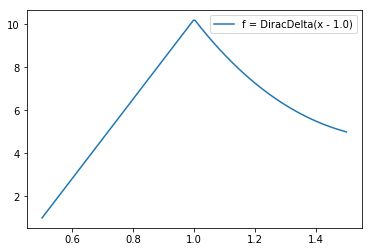

In [114]:
u = solve(0.01 * k, a, b, ua, ub, f1)
plot_solution(u, a, b, 'f = {}'.format(f1))

plt.legend()

### Поиграемся с параметрами и исследуем зависимость функции от f и k

In [18]:
us = [solve(1 / i * k, a, b, ua, ub, f1) for i in range(1, 201)]

sol = {c1: 4.14474928102301, c2: -1.07237464051151}
sol = {c1: 4.28949856204602, c2: -1.14474928102301}
sol = {c1: 4.43424784306904, c2: -1.21712392153452}
sol = {c1: 4.57899712409205, c2: -1.28949856204603}
sol = {c1: 4.72374640511506, c2: -1.36187320255753}
sol = {c1: 4.86849568613808, c2: -1.43424784306904}
sol = {c1: 5.01324496716109, c2: -1.50662248358055}
sol = {c1: 5.15799424818410, c2: -1.57899712409205}
sol = {c1: 5.30274352920711, c2: -1.65137176460356}
sol = {c1: 5.44749281023013, c2: -1.72374640511507}
sol = {c1: 5.59224209125314, c2: -1.79612104562657}
sol = {c1: 5.73699137227615, c2: -1.86849568613808}
sol = {c1: 5.88174065329916, c2: -1.94087032664958}
sol = {c1: 6.02648993432217, c2: -2.01324496716108}
sol = {c1: 6.17123921534519, c2: -2.08561960767259}
sol = {c1: 6.31598849636820, c2: -2.15799424818410}
sol = {c1: 6.46073777739121, c2: -2.23036888869561}
sol = {c1: 6.60548705841422, c2: -2.30274352920711}
sol = {c1: 6.75023633943724, c2: -2.37511816971862}
sol = {c1: 6

sol = {c1: 27.1598849636820, c2: -12.5799424818410}
sol = {c1: 27.3046342447050, c2: -12.6523171223525}
sol = {c1: 27.4493835257280, c2: -12.7246917628640}
sol = {c1: 27.5941328067510, c2: -12.7970664033755}
sol = {c1: 27.7388820877741, c2: -12.8694410438871}
sol = {c1: 27.8836313687971, c2: -12.9418156843986}
sol = {c1: 28.0283806498201, c2: -13.0141903249101}
sol = {c1: 28.1731299308431, c2: -13.0865649654215}
sol = {c1: 28.3178792118661, c2: -13.1589396059330}
sol = {c1: 28.4626284928891, c2: -13.2313142464445}
sol = {c1: 28.6073777739121, c2: -13.3036888869560}
sol = {c1: 28.7521270549351, c2: -13.3760635274676}
sol = {c1: 28.8968763359582, c2: -13.4484381679791}
sol = {c1: 29.0416256169812, c2: -13.5208128084906}
sol = {c1: 29.1863748980042, c2: -13.5931874490021}
sol = {c1: 29.3311241790272, c2: -13.6655620895136}
sol = {c1: 29.4758734600502, c2: -13.7379367300251}
sol = {c1: 29.6206227410732, c2: -13.8103113705366}
sol = {c1: 29.7653720220962, c2: -13.8826860110481}
sol = {c1: 2

<IPython.core.display.Javascript object>


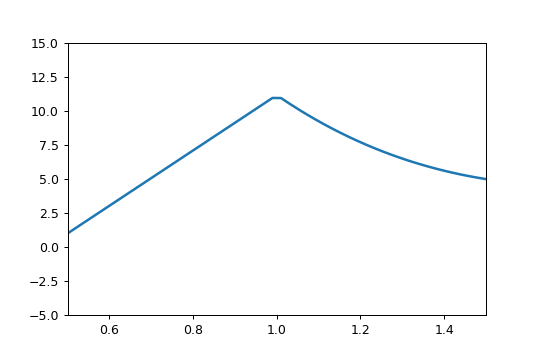

In [115]:
%matplotlib notebook
%matplotlib notebook
from matplotlib import animation

fig = plt.figure() 
ax = plt.axes(xlim=(a, b), ylim=(-5, 15)) 
line, = ax.plot([], [], lw=2) 

# initialization function: plot the background of each frame 
def init(): 
    line.set_data([], []) 
    return line, 

# animation function. This is called sequentially 
def animate(i): 
    u = us[i]
    args = np.linspace(a, b, 50)
    y = [u.subs({x: t}) for t in args]
    line.set_data(args, y) 
    return line, 

# call the animator. blit=True means only re-draw the parts that have changed. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=200, interval=10, blit=True) 

plt.show()

In [20]:
us1 = [solve(k, a, b, ua, ub, i**2 * f1) for i in range(1, 101)]

sol = {c1: 4.14474928102301, c2: -1.07237464051151}
sol = {c1: 4.57899712409205, c2: -1.28949856204603}
sol = {c1: 5.30274352920711, c2: -1.65137176460356}
sol = {c1: 6.31598849636820, c2: -2.15799424818410}
sol = {c1: 7.61873202557531, c2: -2.80936601278766}
sol = {c1: 9.21097411682840, c2: -3.60548705841420}
sol = {c1: 11.0927147701276, c2: -4.54635738506380}
sol = {c1: 13.2639539854728, c2: -5.63197699273640}
sol = {c1: 15.7246917628640, c2: -6.86234588143200}
sol = {c1: 18.4749281023013, c2: -8.23746405115065}
sol = {c1: 21.5146630037845, c2: -9.75733150189225}
sol = {c1: 24.8438964673138, c2: -11.4219482336569}
sol = {c1: 28.4626284928891, c2: -13.2313142464445}
sol = {c1: 32.3708590805105, c2: -15.1854295402552}
sol = {c1: 36.5685882301778, c2: -17.2842941150889}
sol = {c1: 41.0558159418912, c2: -19.5279079709456}
sol = {c1: 45.8325422156506, c2: -21.9162711078253}
sol = {c1: 50.8987670514561, c2: -24.4493835257280}
sol = {c1: 56.2544904493075, c2: -27.1272452246537}
sol = {c1: 6

<IPython.core.display.Javascript object>


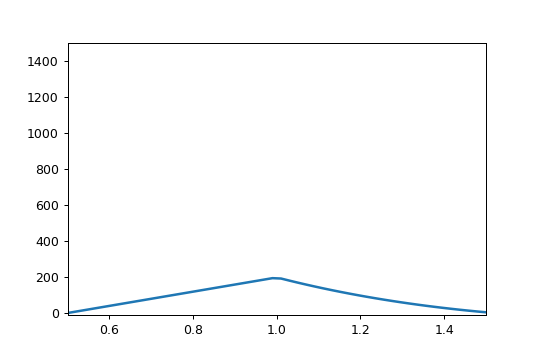

In [21]:
fig = plt.figure() 
ax = plt.axes(xlim=(a, b), ylim=(-10, 1500)) 
line, = ax.plot([], [], lw=2) 

# initialization function: plot the background of each frame 
def init(): 
    line.set_data([], []) 
    return line, 

# animation function. This is called sequentially 
def animate(i): 
    u = us1[i]
    args = np.linspace(a, b, 50)
    y = [u.subs({x: t}) for t in args]
    line.set_data(args, y) 
    return line, 

# call the animator. blit=True means only re-draw the parts that have changed. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=100, interval=10, blit=True) 

plt.show()

### 2 источника

In [121]:
mid = (a + b) / 2
x1 = (a + mid) / 2
x2 = (mid + b) / 2

In [122]:
f2 = DiracDelta(x - x1)
f3 = DiracDelta(x - x2) 

#### Одинаковые по мощности симметрично относительно центра

Input data:
k=0.05*exp(-x)
a=0.5
b=1.5
ua=1
ub=5
f=DiracDelta(x - 1.25) + DiracDelta(x - 0.75)
Resulting equation: c1*x + c2 - 20.0*(exp(x) - 3.49034295746184)*Heaviside(x - 1.25) - 20.0*(exp(x) - 2.11700001661267)*Heaviside(x - 0.75)
Solution: {c1: 71.1207033320322, c2: -34.5603516660161}
------------------------------


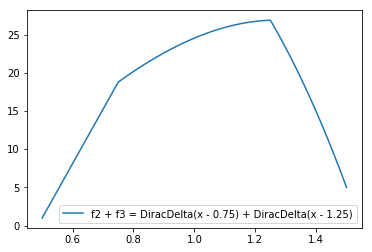

In [123]:
%matplotlib inline
u = solve(1/20/k, a, b, ua, ub, f2 + f3)

plot_solution(u, a, b, 'f2 + f3 = {f2} + {f3}'.format(f2=f2, f3=f3))
plt.legend()
plt.show();

#### Разные по мощности симметрично

Input data:
k=0.05*exp(-x)
a=0.5
b=1.5
ua=1
ub=5
f=DiracDelta(x - 1.25) + 6*DiracDelta(x - 0.75)
Resulting equation: c1*x + c2 - 20.0*(exp(x) - 3.49034295746184)*Heaviside(x - 1.25) - 120.0*(exp(x) - 2.11700001661267)*Heaviside(x - 0.75)
Solution: {c1: 307.589608704571, c2: -152.794804352285}
------------------------------


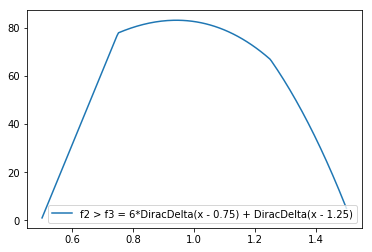

In [126]:
u = solve(1/20/k, a, b, ua, ub, 6 * f2 + f3)

plot_solution(u, a, b, 'f2 > f3 = {f2} + {f3}'.format(f2=6 * f2, f3=f3))
plt.legend()

Input data:
k=0.05*exp(-x)
a=0.5
b=1.5
ua=1
ub=5
f=6*DiracDelta(x - 1.25) + DiracDelta(x - 0.75)
Resulting equation: c1*x + c2 - 120.0*(exp(x) - 3.49034295746184)*Heaviside(x - 1.25) - 20.0*(exp(x) - 2.11700001661267)*Heaviside(x - 0.75)
Solution: {c1: 170.255314619655, c2: -84.1276573098275}
------------------------------


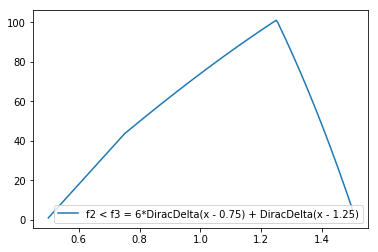

In [127]:
u = solve(1/20/k, a, b, ua, ub, f2 + 6 * f3)

plot_solution(u, a, b, 'f2 < f3 = {f2} + {f3}'.format(f2=6 * f2, f3=f3))
plt.legend()

#### Разные по мощности несимметрично

Input data:
k=0.05*exp(-x)
a=0.5
b=1.5
ua=1
ub=5
f=6*DiracDelta(x - 1.4) + DiracDelta(x - 0.6)
Resulting equation: c1*x + c2 - 120.0*(exp(x) - 4.05519996684467)*Heaviside(x - 1.4) - 20.0*(exp(x) - 1.82211880039051)*Heaviside(x - 0.6)
Solution: {c1: 108.370097818158, c2: -53.1850489090790}
------------------------------


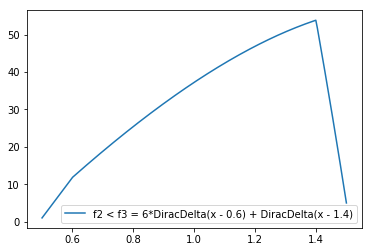

In [129]:
x1 = a + 0.1
x2 = b - 0.1
f2 = DiracDelta(x - x1)
f3 = DiracDelta(x - x2) 

u = solve(1/20/k, a, b, ua, ub, f2 + 6 * f3)

plot_solution(u, a, b, 'f2 < f3 = {f2} + {f3}'.format(f2=6 * f2, f3=f3))
plt.legend()

## Задание 3
Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи - коэффициента теплопроводности k(x) и начальной температуры) φ(x):
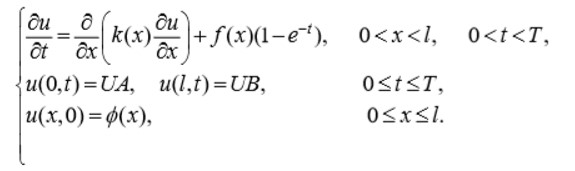

Зададим условие:

In [228]:
x0, x1, t0, t1, ua, ub = 0, 1.5, 0, 2, 0, 5

tau = 0.05
h = 0.01
nt, nx = int((t1 - t0) // tau) + 2, int((x1 - x0) // h) + 2
phi = x**2

g, t = sp.symbols('g t')
g = f * (1 - sp.exp(-t))

In [229]:
k, f

(exp(x), exp(2*x))

### 1. Неявный метод

In [230]:
def solve_implicit(x_start, x_end, h, tau, k, f, cur_t, prev_row, ua=0, ub=5):
    x, t = sp.symbols('x t')

    xs = np.arange(x_start, x_end + h, h)
    n = len(xs)
    
    a = np.zeros((n, n))
    b = np.zeros(n)
    
    for i in range(1, n - 1):
        a[i][i - 1] = - tau * k.subs({x: xi}) # a[i]
        a[i][i] = h**2 + 2 * tau * k.subs({x: xi}) - tau * h * k.diff(x).subs({x: xi}) # b[i]
        a[i][i + 1] = tau * h * k.diff(x).subs({x: xi}) - tau * k.subs({x: xi}) # c[i]
        
        b[i] = h**2 * prev_row[i] + tau * h**2 * f.subs({x: xi, t: cur_t}) # f[i]
    
    # y0 = ua, yn = ub 
    a[0][0] = 1
    b[0] = ua
    a[-1][-1] = 1
    b[-1] = ub
    
    return np.linalg.solve(a, b)

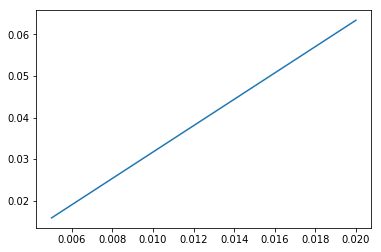

In [240]:
hhh = [2 * h, h, h / 2, h / 4]
errors = []

for pp in range(len(hhh) - 1):
    x = sp.symbols('x')
    nt, nx = int((t1 - t0) // tau) + 2, int((x1 - x0) // hhh[pp]) + 2
    u = np.zeros((nt, nx))

    for i, xi in enumerate(np.arange(x0, x1 + hhh[pp], hhh[pp])):
        u[0][i] = phi.subs({x: xi})

    u[1:, 0] = ua
    u[1:, -1] = ub

    u = np.zeros((nt, nx))
    u1 = np.copy(u)
    for j, t in enumerate(np.arange(t0, t1, tau)):
        if j == 0:
            continue

        yy = solve_implicit(
            x_start=x0,
            x_end=x1,
            h=hhh[pp],
            tau=tau,
            k=k,
            f=g,
            cur_t=t,
            prev_row=u[j - 1, :-1]
        )

        u[j] = yy

        #plt.plot(np.arange(x0, x1 + h, h), yy)
    
    errors += [np.mean([np.abs(u[:, q] - u[:, q + 1]) for q in range(nx - 1)])]

plt.plot(hhh[:-1], errors)
plt.show()

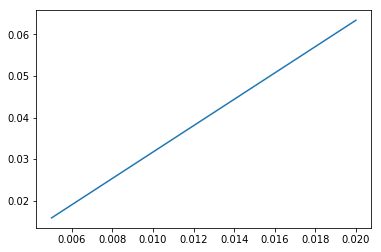

In [241]:
plt.plot(hhh[:-1], errors)

In [203]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

s = np.arange(x0, x1 + h, h)
t = np.arange(t0, t1 + tau, tau)
tGrid, sGrid = np.meshgrid(t, s)

surface = go.Surface(x=sGrid[:, :-1], y=tGrid[:, :-1], z=u.T[:, :-1])
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, auto_open=True)

'file://D:\\study\\MDA\\Sem 5\\lab3\\temp-plot.html'

In [138]:
def solve_explicit(x0, x1, t0, t1, h, tau, k, f, phi, ua=0, ub=5):
    x, t = sp.symbols('x t')
    
    nt, nx = int((t1 - t0) // tau) + 2, int((x1 - x0) // h) + 2
    u = np.zeros((nt, nx))
    
    for i, xi in enumerate(np.arange(x0, x1 + h, h)):
        u[0][i] = phi.subs({x: xi})

    u[1:, 0] = ua
    u[1:, -1] = ub
    
    for i, ti in enumerate(np.arange(t0, t1 + tau, tau)):
        if i == 0:
            continue
        for j, xj in enumerate(np.arange(x0, x1, h)):
            if j == 0:
                continue
            u[i][j] = 1 / h**2 * (
                u[i - 1][j + 1] * tau * k + 
                u[i - 1][j] * (h**2 + tau * h * k.diff(x) - 2 * tau * k) + 
                u[i - 1][j - 1] * (tau * k - tau * h * k.diff(x)) +
                tau * h**2 * f
            ).subs({x: xj, t: ti})
            
    return u

In [139]:
h_ex, tau_ex = 0.2, 0.0025 
u_explicit = solve_explicit(x0, x1, t0, t1, h_ex, tau_ex, k, g, phi)

In [140]:
s = np.arange(x0, x1 + h_ex, h_ex)
t = np.arange(t0, t1 + tau_ex, tau_ex)
tGrid_ex, sGrid_ex = np.meshgrid(t, s)

surface = go.Surface(x=sGrid_ex[:, :-1], y=tGrid_ex[:, :-1], z=u_explicit.T[:, :-1])
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, auto_open=True)

'file://D:\\study\\MDA\\Sem 5\\lab3\\temp-plot.html'

## Задание 4
Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи. Найти приближенное решение начально-краевой задачи для уравнения теплопроводности: 
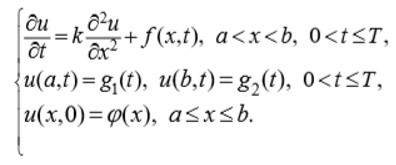

In [195]:
x0, x1, t0, t1, ua, ub = -1, 1, 0, 0.1, 1, 1

k4 = 2
h = 0.2
tau = 0.05 * h**2 / k4 # tau <= 0.5 h**2 / k - условие устойчивости 
nt, nx = int((t1 - t0) // tau) + 2, int((x1 - x0) // h) + 2
phi = x**2

g, t = sp.symbols('g t')
g = 0 * x + 0 * t

In [196]:
tau

0.0010000000000000002

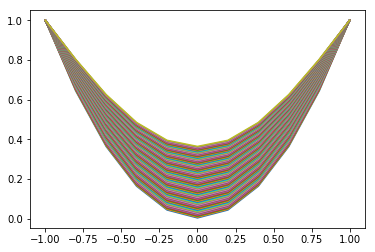

In [197]:
u = np.zeros((nt, nx))

for i, xi in enumerate(np.arange(x0, x1 + h, h)):
    u[0][i] = phi.subs({x: xi})

u[1:, 0] = ua
u[1:, -1] = ub

for j, t in enumerate(np.arange(t0, t1, tau)):
    if j == 0:
        continue
    yy = solve_implicit(
        x_start=x0,
        x_end=x1,
        h=h,
        tau=tau,
        k=k4 + 0 * x,
        f=g,
        cur_t=t,
        prev_row=u[j - 1, :],
        ua=ua,
        ub=ub
    )
    
    u[j] = yy
   
    plt.plot(np.arange(x0, x1 + h, h), yy)


plt.show()

In [198]:
s = np.arange(x0, x1 + h, h)
t = np.arange(t0, t1 + tau, tau)
tGrid, sGrid = np.meshgrid(t, s)

surface = go.Surface(x=sGrid[:, :-1], y=tGrid[:, :-1], z=u.T[:, :-1])
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, auto_open=True)

'file://D:\\study\\MDA\\Sem 5\\lab3\\temp-plot.html'

### Явный метод

In [155]:
u = solve_explicit(
    x0,
    x1,
    t0, 
    t1,
    h=h,
    tau=tau,
    k=k4 + 0 * x,
    f=g,
    phi=phi,
    ua=ua,
    ub=ub
)

plt.show()

In [156]:
surface = go.Surface(x=sGrid[:, :-1], y=tGrid[:, :-1], z=u.T[:, :-1])
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, auto_open=True)

'file://D:\\study\\MDA\\Sem 5\\lab3\\temp-plot.html'